## Zadanie domowe: adaptacyjna filtracja medianowa

Wszystkie omówione i przetestowane powyżej filtry działały w ten sam sposób dla każdego piksela obrazu.
Natomiast przy filtracji adaptacyjnej następuje zmiana parametrów filtru w zależności od statystycznych charakterystyk otoczenia rozpatrywanego piksela.

Omówiony poprzednio filtr medianowy dobrze eliminuje zakłócenia impulsowe o niewielkiej gęstości przestrzennej (mniej niż 20% w pionie i poziomie). 
W zadaniu filtracji bardziej zakłóconych obrazów lepiej sprawdza się adaptacyjny filtr medianowy.  
``Adaptacyjność'' filtra polega na zmianie rozmiaru okna w trakcie filtracji - w zależności od pewnych warunków.

Przyjmijmy następujące oznaczenia:
- $z_{min}$ - najmniejsza jasność w oknie $S_{xy}$
- $z_{max}$ - największa jasność w oknie $S_{xy}$
- $z_{med}$ - mediana z jasności w oknie $S_{xy}$
- $z_{xy}$  - jasność w punkcie o współrzędnych $(x,y)$
- $S_{max}$ - maksymalny dozwolony rozmiar okna $S_{xy}$


Algorytm można opisać następującym pseudokodem:
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
Faza A :<br>	
&nbsp;&nbsp;&nbsp;<b>if</b>  $z_{max}$ > $z_{med}$ > $z_{min}$ <b>then</b> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; to przejdź od fazy B<br>
&nbsp;&nbsp;&nbsp;<b>else</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zwiększ rozmiar okna<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>if</b> rozmiar okna <= $S_{max}$ <b>then</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;to powtórz fazę A<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>else</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zwróć $z_{med}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>end if</b><br>
&nbsp;&nbsp;&nbsp;<b>end if</b><br>
Faza B :<br>
&nbsp;&nbsp;&nbsp;<b>if</b>  $z_{max}$ > $z_{xy}$ > $z_{min}$ <b>then</b>  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;to zwróć  $z_{xy}$ <br>
&nbsp;&nbsp;&nbsp;<b>else</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zwróć $z_{med}$<br>
&nbsp;&nbsp;&nbsp;<b>end if</b><br>
</div>


#### Wyjaśnienie działania:

Cały czas należy pamiętać, jakie są cele działania filtru:
- usunięcie zakłóceń typu pieprz i sól (ang. _salt and pepper noise),
- wygładzenie innego rodzaju zakłóceń,
- redukcja zniekształceń (pogrubianie albo pocienianie krawędzi).

Wartości $z_{min}$ i $z_{max}$ uważa się za zakłócenia impulsowe w danym oknie, nawet jeżeli nie są to największa i najmniejsza wartość w całym obrazie.

Celem fazy A jest określenie czy rezultat filtracji medianowej $z_{med}$ jest zakłóceniem impulsowym czy nie. 
Jeżeli spełniona jest nierówność $z_{min}$ < $z_{med}$ < $z_{max}$ wartość  $z_{med}$ nie może być zakłóceniem impulsowym. 
W takim przypadku przechodzimy do fazy B i sprawdzamy czy piksel $z_{xy}$ jest zakłóceniem impulsowym. 
Jeżeli spełniona jest nierówność   $z_{min}$ < $z_{xy}$ < $z_{max}$, $z_{xy}$ nie może być zakłóceniem impulsowym. 
W takim przypadku algorytm zwraca niezmienioną wartość $z_{xy}$ - w ten sposób zmniejsza się zniekształcenia.
Jeżeli nierówność  $z_{min}$ < $z_{xy}$ < $z_{max}$ nie jest spełniona oznacza to, że albo $z_{xy}$ = $z_{min}$ albo  $z_{xy}$ = $z_{max}$. 
W obu przypadkach uznaje się, że wartość  $z_{xy}$ jest zakłóceniem i jako wynik filtracji zwraca się wartość  $z_{med}$ , o której na podstawie fazy A wiadomo, że nie jest zakłóceniem.

Przypuśćmy, że nie została spełniona nierówność   $z_{min}$ < $z_{med}$ < $z_{max}$, algorytm wtedy zwiększa rozmiar okna i powtórnie wykonuje fazę A. 
Dzieje się tak aż do momentu, kiedy algorytm znajdzie medianę, która nie jest zakłóceniem impulsowym albo osiągnięty zostanie maksymalny rozmiar okna. 
W przypadku gdy osiągnięty zostanie maksymalny rozmiar okna algorytm zwraca wartość $z_{med}$. 
Nie ma gwarancji, że wartość ta nie jest zakłóceniem impulsowym, jednakże odpowiedni dobór maksymalnego rozmiaru okna pozwala zminimalizować prawdopodobieństwo wystąpienia takiej sytuacji.

Po wyznaczeniu wartości po filtracji dla danego piksela, okno filtru się przemiesza, a algorytm uruchamiany jest dla nowej lokalizacji z parametrami początkowymi.

#### Zadanie - zaimplementować metodę:

1. Wczytaj obrazy _plytkaSzumImp.png_.  Wyświetl go.

2. Przefiltruj obraz filtrem medianowym o rozmiarze okna $5 \times 5$. Wynik filtracji wyświetl.

3. Zaimplementuj opisany adaptacyjny filtr medianowy. Wskazówki:
- należy przyjąć maksymalny rozmiar okna na $7 \times 7$, a początkowy na $3 \times 3$. Zakładamy, że rozmiar filtru powinien być nieparzysty. 
- obliczenia trzeba wykonać w dwóch pętlch `for` (odwiedzić, każdy piksel) - dla ułatwienia zaleca się pominięcie pikseli brzegowych (jeżeli maksymalny rozmiar okna wynosi $7 \times 7$ to nie należy dokonywać obliczeń dla 3 pikseli brzegowych)
- w każdej iteracji należy:
    - przywrócić początkowy rozmiar okna ($3 \times 3$),
    - "wyciąć" otoczenie (parametr opisujący rozmiar otoczenia należy "uzmiennić")
    - obliczyć parametry: $z_{min}$, $z_{max}$, $z_{med}$ (metody wycinka `min`, `max` i funkcja `np.median` 

- wykonać opisany algorytm. Uwaga: obliczenia mogę się chwilkę wykonywać.

4. Porównaj rezultaty filtracji medianowej i adaptacyjnej.      

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["plytkaSzumImp.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

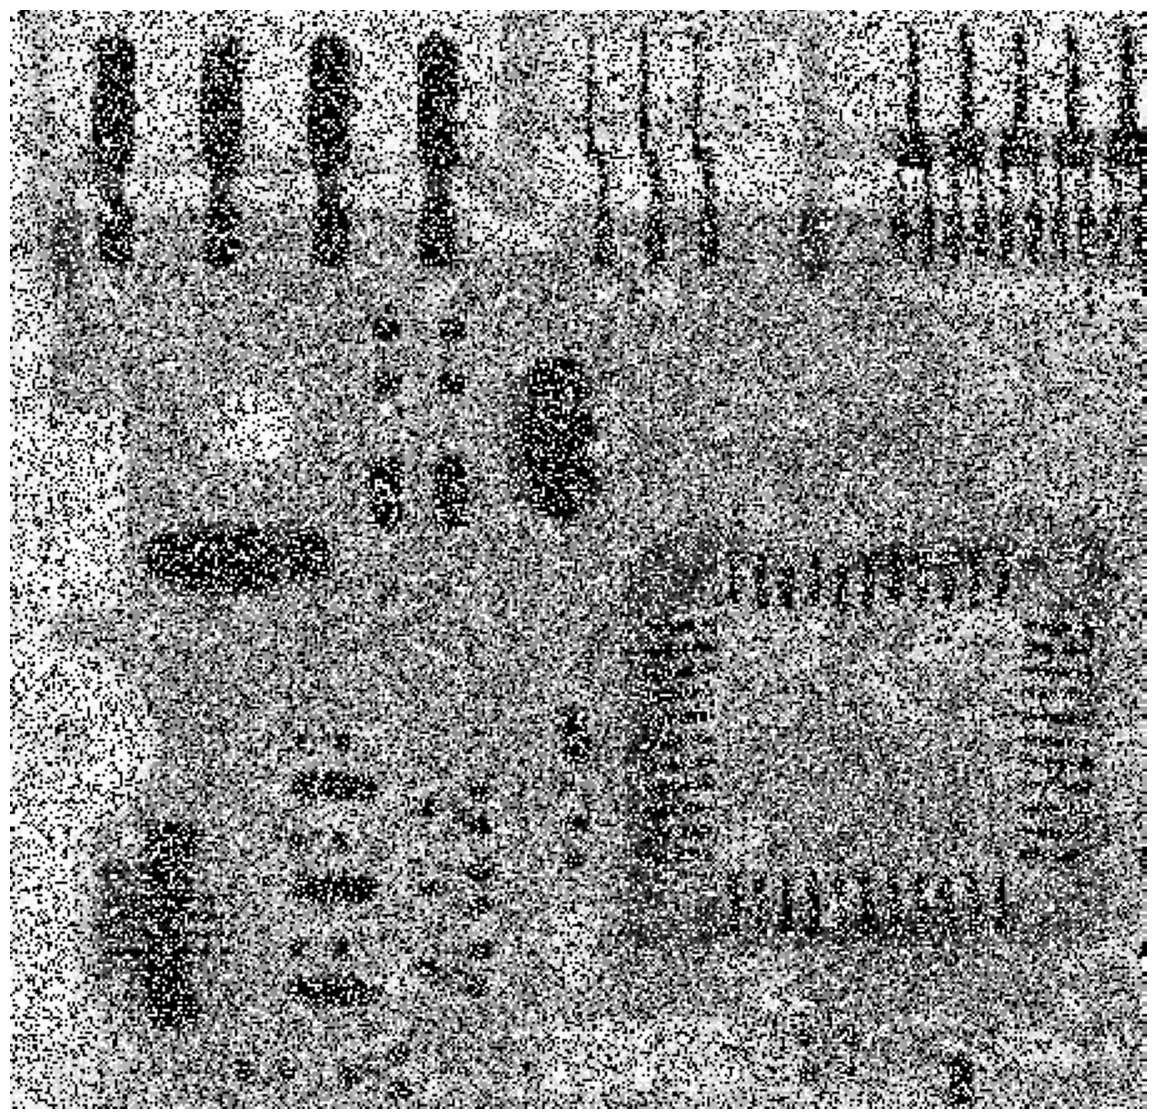

In [3]:
def imread(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
def plot_img(img, cmap='gray', title=''):
    plt.figure(figsize=(img.shape[0]/30,img.shape[1]/30))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
plate = imread('plytkaSzumImp.png')

plot_img(plate)

In [4]:
def convolve_image(img, kernel, borderType=cv2.BORDER_REPLICATE):
    if kernel is None:
        raise ValueError('Kernel cannot be None.')
    return cv2.filter2D(img, -1, kernel, borderType=borderType)

def normalize_result(dst, normalize=None):
    if normalize == 'add128':
        dst = dst + 128
    elif normalize == 'abs':
        dst = np.abs(dst)
    return dst

def visualize_images(img, dst=None, show_orig=True, show_dst=True, show_diff=False):
    images = []
    titles = []

    if show_orig:
        images.append(img)
        titles.append('Original Image')

    if show_dst and dst is not None:
        images.append(dst)
        titles.append('Image with Kernel')

    if show_diff and dst is not None:
        diff = dst.astype(np.int32) - img.astype(np.int32)
        max_val = np.max(np.abs(diff))
        diff[0, 0] = max_val  # For color scale
        diff[-1, -1] = -max_val
        images.append(diff)
        titles.append('Difference')

    cols = len(images)
    if cols == 0:
        raise ValueError("No images to display. Enable one of 'show_orig', 'show_dst', or 'show_diff'.")

    fig, axs = plt.subplots(1, cols, figsize=(cols * 5, 5))
    axs = np.atleast_1d(axs)

    for ax, img, title in zip(axs, images, titles):
        cmap = 'coolwarm' if title == 'Difference' else 'gray'
        vmin = None if title == 'Difference' else 0
        vmax = None if title == 'Difference' else 255
        ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

def kernel(img, kernel=None, plot=True, borderType=cv2.BORDER_REPLICATE,
           show_orig=True, show_dst=True, show_diff=False, dst=None, normalize=None):
    if dst is None:
        if kernel is None:
            raise ValueError("Kernel cannot be None.")

        dst = convolve_image(img, kernel, borderType)
        dst = normalize_result(dst, normalize)

    if plot:
        visualize_images(img, dst, show_orig, show_dst, show_diff)

    return dst

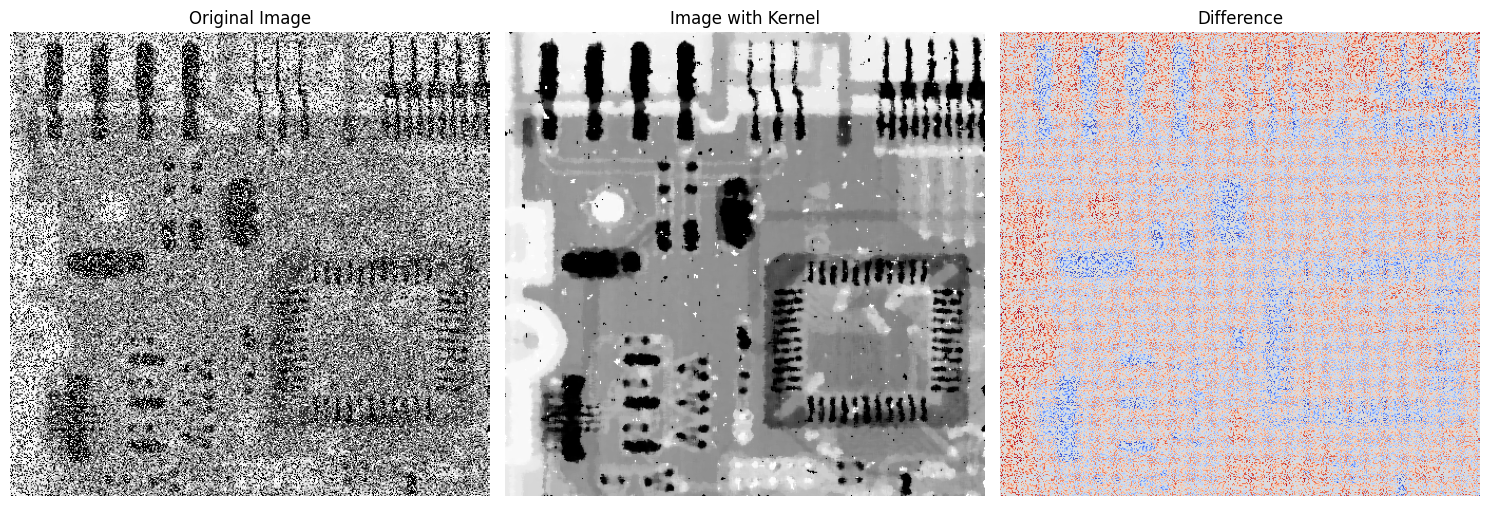

In [12]:
dst = cv2.medianBlur(plate, 5)
nolinear = kernel(plate, dst=dst, show_diff=True)

In [17]:
def adaptive_median_compare(img, start_window_size=3, max_window_size=7, 
                            plot=True, show_orig=True, show_dst=True, show_diff=True):

    def adaptive_median_kernel(img, start_window_size=3, max_window_size=7):
        def A(y, x, window_size=start_window_size):
            radius = window_size // 2
            S = img[y-radius:y+radius+1, x-radius:x+radius+1]
            
            z_max, z_med, z_min = np.max(S), np.median(S), np.min(S)
            z_xy = img[y, x]
            
            if z_max > z_med > z_min:
                return B(z_xy, z_min, z_med, z_max)
            else:
                window_size += 2
                if window_size <= max_window_size:
                    return A(y, x, window_size)
                else:
                    return z_med

        def B(z_xy, z_min, z_med, z_max):
            return z_xy if z_max > z_xy > z_min else z_med

        result = np.empty(img.shape, dtype=img.dtype)
        margin = max_window_size // 2
        for y in range(margin, img.shape[0] - margin):
            for x in range(margin, img.shape[1] - margin):
                result[y, x] = A(y, x)
        return result

    dst = adaptive_median_kernel(img, start_window_size, max_window_size)

    if plot:
        visualize_images(img, dst, show_orig=show_orig, show_dst=show_dst, show_diff=show_diff)

    return dst

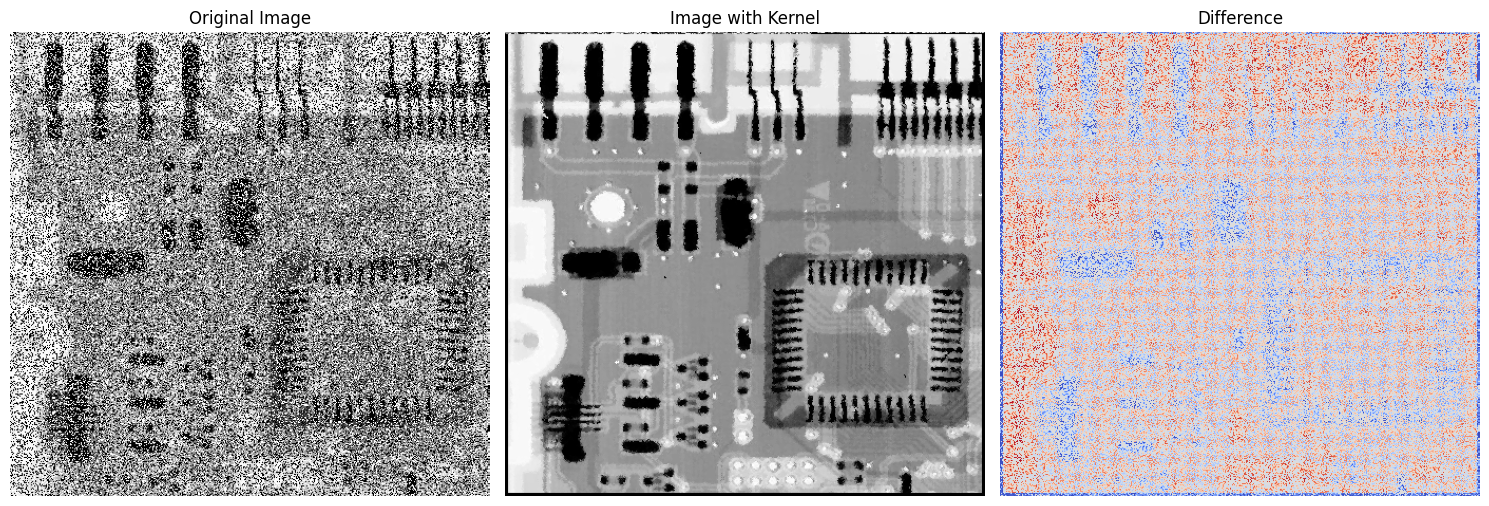

In [18]:
adaptive_result = adaptive_median_compare(plate)

In [ ]:
# Możemy teraz porównać działanie tych 2 metod. Warto zauważyć, że na pierwszy rzut oka, z obrazu wejściowego nie wiele da się wyciągnąć, ale jak się
# okazało, istnieją metody, które mogą przynieść wiele informacji.

# Klasyczny filtr medianowy działa dobrze, usuwa większość szumów, natomiast lekko zniekształca obiekty na obrazie, nie wszystkie z nich da się
# interpretować. Ta klasyczna metoda nie adaptuje się do lokalnej struktury obrazu, więc szczegóły mogą być tracone.

# Adaptacyjna filtracja medianowa z kolei działa dużo lepiej. Szumy są prawie niezauważalne, wszystkie linie i drobne elementy są zachowane dzięki
# dostosowaniu rozmiaru okna filtracji do lokalnych cech obrazu. Metoda adaptacyjna zapewnia lepszy balans między eliminacją szumów a zachowaniem
# szczegółów w porównywaniu do klasycznego podejścia.